In [57]:
def one_time():
   import pyscreenshot as ImageGrab
   import time
   images_folder="captured_images/9/"
   
   for i in range(2,10):
      time.sleep(5)
      im=ImageGrab.grab(bbox=(60,170,450,500)) #x1,y1,x2,y2
      print("saved......",i)
      im.save(images_folder+str(i)+'.png')
      print("clear screen now and redraw now........")

saved...... 2
clear screen now and redraw now........
saved...... 3
clear screen now and redraw now........
saved...... 4
clear screen now and redraw now........
saved...... 5
clear screen now and redraw now........
saved...... 6
clear screen now and redraw now........
saved...... 7
clear screen now and redraw now........
saved...... 8
clear screen now and redraw now........
saved...... 9
clear screen now and redraw now........


## Fetching dataset

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784' , as_frame=False)

C:\Users\ANANT TIWARI\AppData\Roaming\Python\Python311\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
x,y = mnist['data'], mnist['target']

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

## Observing one digit:

In [17]:
# In the form of array => converting it in matrix
some_digit = x[3600]
some_digit_image = some_digit.reshape(28,28) # reshaping for plotting


(-0.5, 27.5, 27.5, -0.5)

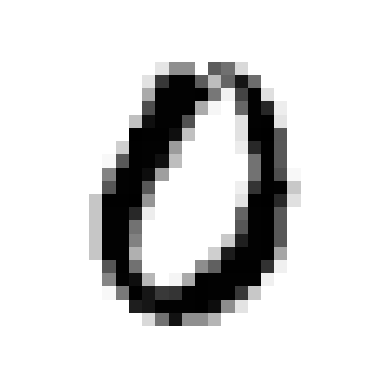

In [18]:
plt.imshow(some_digit_image, cmap='binary', interpolation='nearest')
plt.axis('off')   #Feature

In [10]:
y[3600]   #Label

'8'

In [19]:
# first 60000 train and 60000 testing already divided
x_train, x_test = x[0:60000], x[60000:]

In [20]:
y_train, y_test = y[0:60000], y[60000:]

In [24]:
import numpy as np
shuffle_index = np.random.permutation(60000)
# Shuffle to get all the data 
x_train , y_train = x_train[shuffle_index], y_train[shuffle_index]
x[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

## Creating a 2 detector

In [22]:
# string to integers
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

# Where there is 2 make it true
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [23]:
y_test_2

array([False,  True, False, ..., False, False, False])

## Using Logistic Regression:

In [25]:
# apply classifier
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression(tol=0.1)  # Classifier (Object)

In [27]:
clf.fit(x_train, y_train_2)   #Binary Classifier
# x_train as data and y_train as T and F corresponding to every data value

C:\Users\ANANT TIWARI\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [28]:
some_digit = x[2004]
# print(y[2004]) => 2
some_digit_image = some_digit.reshape(28,28) # reshaping for plotting

In [29]:
clf.predict([some_digit])

array([False])

In [30]:
# Due to current split of training and testing the results are such 
# But to test among many splits we perform cross validation
# https://medium.com/analytics-vidhya/deeply-explained-cross-validation-in-ml-ai-2e846a83f6ed
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

C:\Users\ANANT TIWARI\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ANANT TIWARI\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [31]:
a.mean()

0.9006166666666666

### Classifier as not 2

In [32]:
y_train_n2 = (y_train!=2)
print(y_train_n2)

[ True  True  True ...  True  True  True]


In [33]:
clf.fit(x_train,y_train_n2)

C:\Users\ANANT TIWARI\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [34]:
clf.predict([some_digit])

array([False])

In [35]:
b = cross_val_score(clf, x_train, y_train_n2, cv=3, scoring="accuracy")

C:\Users\ANANT TIWARI\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ANANT TIWARI\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [36]:
b.mean()

0.9782500000000001

In [1]:
import tensorflow as tf
import Augmentor

In [60]:
import cv2
import csv
import glob
  
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
    
for label in range(10):
   dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
       data=[]
       data.append(label)
       rows, cols = roi.shape
        
       ## Fill the data array with pixels one by one.
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)

In [61]:
import pandas as pd 
from sklearn.utils import shuffle 
 
data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)
X = data.drop(["label"],axis=1)
Y= data["label"]

    label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
25      2       1       1       1       1       1       1       1       1   
4       0       1       1       1       1       1       1       1       1   
35      3       1       1       1       1       1       1       1       1   
66      6       1       1       1       1       1       1       1       1   
3       0       1       1       1       1       1       1       1       1   
..    ...     ...     ...     ...     ...     ...     ...     ...     ...   
92      9       1       1       1       1       1       1       1       1   
33      3       1       1       1       1       1       1       1       1   
62      6       1       1       1       1       1       1       1       1   
18      1       1       1       1       1       1       1       1       1   
0       0       1       1       1       1       1       1       1       1   

    pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 314
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

KeyError: 314

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

In [ ]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

In [ ]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

In [59]:
import joblib
import cv2
import pyscreenshot as ImageGrab
  
model=joblib.load("model/digit_recognizer")
image_folder="img/"
  
while True:
   img=ImageGrab.grab(bbox=(60,170,450,500))
    
   img.save(images_folder+"img.png")
   im = cv2.imread(images_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
    
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
    
   rows,cols=roi.shape
    
   X = []
    
   ##  Fill the data array with pixels one by one.
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
            
   predictions  =model.predict([X])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
    
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(10000)
   if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
       break
cv2.destroyAllWindows()

Prediction: True
Prediction: True
Prediction: True
Prediction: True
Prediction: True


KeyboardInterrupt: 